In [1]:
print('hello world')


hello world


In [2]:
import torch
from flamingo_mini import FlamingoModel, FlamingoConfig, FlamingoProcessor
from flamingo_mini.utils import load_url
from einops import repeat

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import pandas as pd

In [3]:
model = FlamingoModel.from_pretrained('dhansmair/flamingo-mini')           # or flamingo-tiny
processor = FlamingoProcessor(model.config)

config.json: 100%|██████████| 544/544 [00:00<00:00, 1.11MB/s]
pytorch_model.bin: 100%|██████████| 3.34G/3.34G [03:14<00:00, 17.2MB/s]
config.json: 100%|██████████| 4.52k/4.52k [00:00<00:00, 7.77MB/s]
model.safetensors: 100%|██████████| 1.71G/1.71G [00:15<00:00, 108MB/s] 
config.json: 100%|██████████| 644/644 [00:00<00:00, 1.44MB/s]
pytorch_model.bin: 100%|██████████| 663M/663M [00:06<00:00, 102MB/s]  
config.json: 100%|██████████| 651/651 [00:00<00:00, 1.47MB/s]
vocab.json: 100%|██████████| 899k/899k [00:00<00:00, 1.77MB/s]
merges.txt: 100%|██████████| 456k/456k [00:00<00:00, 1.20MB/s]
special_tokens_map.json: 100%|██████████| 221/221 [00:00<00:00, 491kB/s]


In [4]:
df_raw_tweets = pd.read_csv("emoji_text.csv")

In [5]:
df_raw_tweets.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1                       time  \
0           0             0               0  2023-11-15 04:16:49+00:00   
1           1             1               1  2023-11-15 04:03:38+00:00   
2           2             2               2  2023-11-15 04:02:59+00:00   
3           3             3               3  2023-11-15 04:02:22+00:00   
4           4             4               4  2023-11-15 04:01:44+00:00   

                                                text  emojis    emoji_idxs  
0  @metaonewallet Ready to elevate your project's...    📢,📥,      120,130,  
1  @DogeGod_token @PancakeSwap Outstanding job! R...  🚀,📈,📥,  108,109,119,  
2  @The_RWAX Let's connect and discuss how my tea...    📥,🌠,        95,96,  
3  @InfiniteTradePR @dHedgeOrg Outstanding job! R...  🚀,📈,📥,  108,109,119,  
4  @NFToGu @foundation Ready to elevate your proj...    📢,📥,      125,135,

In [6]:
def is_emoji(s,df_emoji_file):
    # Check if a character is an emoji based on Unicode ranges
    if s in list(df_emoji_file['emoji']):
        return True
    else:
        return False

def extract_and_index_emojis(string_dst,df_emoji_file):
    emo_list = []
    emoidx_list = []
    emojis = ""
    emoji_idx = ""
    for i in range(len(string_dst)):
        char = string_dst[i]
        if is_emoji(char,df_emoji_file):
            emojis+=(char+',')
            emo_list.append(char)
            emoji_idx+=(str(i)+',')
            emoidx_list.append(i)

            
    return emojis, emoji_idx,emo_list, emoidx_list

In [9]:
emojis_list = []
emoji_idx = []
emo_expri =[]
emoidx_expri = []
for text in df_raw_tweets['text']:
    emojis_list_text, emoji_idx_text, emolist, emoidx_list = extract_and_index_emojis(text,df_emoji_file)
    emojis_list.append(emojis_list_text)
    emoji_idx.append(emoji_idx_text)
    emo_expri.append(emolist)
    emoidx_expri.append(emoidx_list)

In [10]:
df_raw_tweets['emojis'] = emojis_list
df_raw_tweets['emoji_idxs'] = emoji_idx

In [11]:
df_raw_tweets.to_csv("emoji_text.csv")

In [14]:
str(1)

'1'

In [7]:
df_emoji_file = pd.read_csv("emoji_unicode_file.csv")

In [8]:
df_emoji_file.head()

Unnamed: 0 emoji unicode                   filename
0           0     🔥   1f525  emoji_pic/emoji_1f525.png
1           1     🚀   1f680  emoji_pic/emoji_1f680.png
2           2     🏆   1f3c6  emoji_pic/emoji_1f3c6.png
3           3     👇   1f447  emoji_pic/emoji_1f447.png
4           4     👀   1f440  emoji_pic/emoji_1f440.png

In [12]:
emo_expri

[['📢', '📥'],
 ['🚀', '📈', '📥'],
 ['📥', '🌠'],
 ['🚀', '📈', '📥'],
 ['📢', '📥'],
 ['📥', '🌠'],
 ['🚀', '📈', '📥'],
 ['📢', '📥'],
 ['📥', '🌠'],
 ['👋', '🔥', '💌', '📩', '💌'],
 ['🤝'],
 ['👍', '👍', '🚀'],
 ['📨', '🔥'],
 ['📩', '📩', '🚀', '🚀'],
 ['👋', '🔥', '💌', '📩', '💌'],
 ['📨', '🔥'],
 ['🔥', '💯', '👀', '🚀', '🔥'],
 ['👋', '🔥', '💌', '📩', '💌'],
 ['🤝'],
 ['🔥', '💯', '👀', '🚀', '🔥'],
 ['🔥', '💯', '👀', '🚀', '🔥'],
 ['📩', '🚀', '🚀', '🤝'],
 ['📥', '🚀'],
 ['👋', '🔥', '💌', '📩', '💌'],
 ['📩', '🚀', '🚀', '🤝'],
 ['👀', '💌'],
 ['👀', '💌'],
 ['📥', '🚀'],
 ['🤝'],
 ['🚀', '🔥', '📩'],
 ['📥', '🚀'],
 ['📥', '🚀'],
 ['💡', '📈', '🤝', '📩'],
 ['📩', '📩'],
 ['👍', '👍', '🚀'],
 ['📥', '🚀'],
 ['📩', '🚀', '🚀', '🤝'],
 ['👋', '🔥', '💌', '📩', '💌'],
 ['🔥', '💯', '👀', '🚀', '🔥'],
 ['📩', '📩', '🚀', '🚀'],
 ['📨', '🔥'],
 ['📩', '📩', '🚀', '🚀'],
 ['👍', '👍', '🚀'],
 ['👋', '🔥', '💌', '📩', '💌'],
 ['👋', '🔥', '💌', '📩', '💌'],
 ['📨'],
 ['💡', '📈', '🤝', '📩'],
 ['📩', '🤝'],
 ['💡', '📈', '🤝', '📩'],
 ['📩', '🚀', '🚀', '🤝'],
 ['📩', '🚀', '🚀', '🤝'],
 ['📩', '🚀', '🚀', '🤝'],
 ['💡', '📈', '🤝', '📩'],
 

In [13]:
emoidx_expri

[[120, 130],
 [108, 109, 119],
 [95, 96],
 [108, 109, 119],
 [125, 135],
 [105, 106],
 [97, 98, 108],
 [132, 142],
 [100, 101],
 [23, 67, 95, 96, 97],
 [72],
 [95, 106, 133],
 [77, 78],
 [68, 69, 70, 71],
 [36, 80, 108, 109, 110],
 [74, 75],
 [59, 60, 62, 63, 64],
 [29, 73, 101, 102, 103],
 [92],
 [84, 85, 87, 88, 89],
 [48, 49, 51, 52, 53],
 [91, 92, 93, 96],
 [76, 77],
 [39, 83, 111, 112, 113],
 [87, 88, 89, 92],
 [76, 77],
 [74, 75],
 [77, 78],
 [71],
 [74, 75, 94],
 [75, 76],
 [79, 80],
 [29, 49, 69, 71],
 [69, 70],
 [27, 38, 65],
 [54, 57],
 [89, 90, 91, 94],
 [23, 67, 95, 96, 97],
 [45, 46, 48, 49, 50],
 [69, 70, 71, 72],
 [79, 80],
 [81, 82, 83, 84],
 [45, 56, 83],
 [38, 82, 110, 111, 112],
 [23, 67, 95, 96, 97],
 [98],
 [35, 55, 75, 77],
 [189, 190],
 [31, 51, 71, 73],
 [92, 93, 94, 97],
 [86, 87, 88, 91],
 [92, 93, 94, 97],
 [36, 56, 76, 78],
 [80, 100, 120, 122],
 [51, 52],
 [51, 52, 54, 55, 56],
 [104, 105],
 [77, 78, 97],
 [31, 53],
 [13, 57, 58, 59, 60],
 [76, 77],
 [76, 7

In [ ]:
prompt = "Impressive work 👍<image>. DM mate 👍<image>, let's get this Trending 🚀<image>. <EOC> <image>here means:"
response = multimodal_prompt(model, processor, prompt, images=[image1,image1,image,image1])

In [14]:
import sys

In [15]:
def insert_substring_at_indices(main_string, indices, substring):
    # 将索引列表按降序排序
    sorted_indices = sorted(indices, reverse=True)

    # 从后向前遍历索引，并在每个索引处插入子字符串
    for index in sorted_indices:
        if 0 <= index <= len(main_string):
            main_string = main_string[:index] + substring + main_string[index:]

    return main_string

list_promot = []
full_len = len(emoidx_expri)
for i in range(len(emoidx_expri)):
    perc = int(i*100/full_len)
    sys.stdout.write(("\r[%3s%%]: |%-50s|")%(perc,'|'*int((perc/2))))
    indices = [position+1 for position in emoidx_expri[i]]
    main_string = df_raw_tweets['text'][i]
    substring = '<image>'
    promot = insert_substring_at_indices(main_string, indices, substring)
    list_promot.append(promot)


[ 99%]: |||||||||||||||||||||||||||||||||||||||||||||||||| |

In [16]:
list_promot[0]

"@metaonewallet Ready to elevate your project's visibility? Get in touch, and let's work together to achieve your goals. 📢<image> Send DM 📥<image>"

In [17]:
list_promot_final = [item+"<EOC> <image>here means:" for item in list_promot]

In [18]:
list_promot_final

["@metaonewallet Ready to elevate your project's visibility? Get in touch, and let's work together to achieve your goals. 📢<image> Send DM 📥<image><EOC> <image>here means:",
 "@DogeGod_token @PancakeSwap Outstanding job! Ready to take it to the next level? Let's promote it together. 🚀<image>📈<image> Send DM 📥<image><EOC> <image>here means:",
 "@The_RWAX Let's connect and discuss how my team can help your project shine. Contact me Via DM 📥<image>🌠<image><EOC> <image>here means:",
 "@InfiniteTradePR @dHedgeOrg Outstanding job! Ready to take it to the next level? Let's promote it together. 🚀<image>📈<image> Send DM 📥<image><EOC> <image>here means:",
 "@NFToGu @foundation Ready to elevate your project's visibility? Get in touch, and let's work together to achieve your goals. 📢<image> Send DM 📥<image><EOC> <image>here means:",
 "@limitrofi @nosk8fx Let's connect and discuss how my team can help your project shine. Contact me Via DM 📥<image>🌠<image><EOC> <image>here means:",
 "@haunted_uPToke

In [19]:
df_raw_tweets['promot'] = list_promot_final

In [20]:
df_raw_tweets.to_csv("emoji_text.csv")

In [5]:
import torch
from flamingo_mini import FlamingoModel, FlamingoConfig, FlamingoProcessor
from flamingo_mini.utils import load_url
from einops import repeat
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import sys

def gen_dict_pic():
    dict_pic = {}
    df_pic_label = pd.read_csv("emoji_unicode_file.csv")
    for i in range(len(df_pic_label['emoji'])):
        dict_pic[df_pic_label['emoji'][i]] = image1 = Image.open(df_pic_label['filename'][i])
    return dict_pic

def split_emojis(string_emojis):
    return string_emojis.split(",")[:-1]

def multimodal_prompt(model: FlamingoModel, processor: FlamingoProcessor, prompt: str, images: list) -> str:
    """few-shot multimodal prompting 
    
    shape for visual_features parameter: [b=batch size, N=number of images, T=1 (number of frames), v=number of visual features, d=dimensionality of visual feature]
    (I haven't checked if it works with videos)
    """
    input_ids, media_locations, attention_mask = processor.encode_text(prompt)

    pixels = processor(images)['pixel_values']
    pixels = repeat(pixels, 'N c h w -> b N T c h w', b=1, T=1)
    
    output = model.generate(
        inputs=input_ids,
        media_locations=media_locations,
        attention_mask=attention_mask,
        pixel_values=pixels,
        max_length=1000,
        use_cache=True,
        early_stopping=True,
        bos_token_id=model.flamingo.lm.config.bos_token_id,
        eos_token_id=model.flamingo.lm.config.eos_token_id,
        pad_token_id=model.flamingo.lm.config.eos_token_id
    )

    response = processor.tokenizer.batch_decode(output, skip_special_tokens=True)
    return response[0]

dict_pic = gen_dict_pic()
df_emoji_text = pd.read_csv("emoji_text.csv")
model = FlamingoModel.from_pretrained('/Users/xrz/Desktop/Chaos/model')           # or flamingo-tiny
processor = FlamingoProcessor(model.config)

with open('description.txt','a') as fp:
    full_len = len(df_emoji_text['promot'])
    for i in range(8, len(df_emoji_text['promot'])):
        perc = int(i*100/full_len)
        sys.stdout.write(("\r[%3s%%]: |%-50s|")%(perc,'|'*int((perc/2))))
        prompt = df_emoji_text['promot'][i]
        emoji_list = split_emojis(df_emoji_text['emojis'][i])
        images = [dict_pic[emoji_contained] for emoji_contained in emoji_list]
        for item in emoji_list:
            images_temp = images + [dict_pic[item]]
            response = multimodal_prompt(model, processor, prompt, images=images_temp)
            description = response[len(prompt):]
            fp.write(str(i)+"\n")
            fp.write(description+'\n')





[  0%]: |                                                  |

/Users/xrz/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/xrz/opt/anaconda3/lib/python3.8/site-packages/transformers/generation/configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


[  0%]: |                                                  |

In [2]:
# Define the path to your text file
file_path = 'description.txt'

# Open the file and read its content
with open(file_path, 'r') as file:
    content = file.read()

# Replace 'ERROR' with 'ERROR\n'
modified_content = content.replace('<EOC>', '')

# Write the modified content back to the file
with open(file_path, 'w') as file:
    file.write(modified_content)



In [4]:
result_dict = {}

with open('description.txt', 'r') as file:
    while True:
        # Read number line
        num_line = file.readline().strip()
        # Check if we have reached the end of the file
        if not num_line:
            break
        num = int(num_line)

        # Read string line
        str_line = file.readline().strip()
        # Ignore specific strings
        if str_line in ["-100: ERROR"]:
            continue

        # Add to dictionary
        if num not in result_dict:
            result_dict[num] = []
        result_dict[num].append(str_line)

print(result_dict)



{0: ['merry christmas to you all!', 'merry christmas to all of the world.'], 1: ['a rocket that can fly.', 'icon in the shop window', 'integral icon - click here to find out all about the hidden icons'], 2: ['the new way to do your illustrations', 'the star of the series'], 3: ['a rocket that can fly.', 'graphs are the most important figures in the world.', 'marijuanaose the new way to do it.'], 4: ['merry christmas to you all!', 'merry christmas to all of the world'], 5: ['the new way to do your own laundry', 'the way to do your work'], 6: ['a rocket that can fly.', 'graphs are the most important figures in the world.', 'the secret life of the human brain'], 7: ['merry christmas to all of you.', 'merry christmas to all of the world.'], 8: ['the new way to do your illustrations', 'the star of the stars'], 9: ['a hand gesture that can be used to signal that you are ready to give or give.', '- like the flames of fire can be so sweet!', 'love is the best of love', 'icon - click here for m

In [7]:
df_emoji_text = pd.read_csv("emoji_text.csv")

In [10]:
dict_idx = {}
for i in range(len(df_emoji_text['emoji_idxs'])):
    try:
        dict_idx[i] = [int(item) for item in df_emoji_text['emoji_idxs'][i].split(',')[:-1]]
    except:
        continue


In [11]:
dict_idx

{0: [120, 130],
 1: [108, 109, 119],
 2: [95, 96],
 3: [108, 109, 119],
 4: [125, 135],
 5: [105, 106],
 6: [97, 98, 108],
 7: [132, 142],
 8: [100, 101],
 9: [23, 67, 95, 96, 97],
 10: [72],
 11: [95, 106, 133],
 12: [77, 78],
 13: [68, 69, 70, 71],
 14: [36, 80, 108, 109, 110],
 15: [74, 75],
 16: [59, 60, 62, 63, 64],
 17: [29, 73, 101, 102, 103],
 18: [92],
 19: [84, 85, 87, 88, 89],
 20: [48, 49, 51, 52, 53],
 21: [91, 92, 93, 96],
 22: [76, 77],
 23: [39, 83, 111, 112, 113],
 24: [87, 88, 89, 92],
 25: [76, 77],
 26: [74, 75],
 27: [77, 78],
 28: [71],
 29: [74, 75, 94],
 30: [75, 76],
 31: [79, 80],
 32: [29, 49, 69, 71],
 33: [69, 70],
 34: [27, 38, 65],
 35: [54, 57],
 36: [89, 90, 91, 94],
 37: [23, 67, 95, 96, 97],
 38: [45, 46, 48, 49, 50],
 39: [69, 70, 71, 72],
 40: [79, 80],
 41: [81, 82, 83, 84],
 42: [45, 56, 83],
 43: [38, 82, 110, 111, 112],
 44: [23, 67, 95, 96, 97],
 45: [98],
 46: [35, 55, 75, 77],
 47: [189, 190],
 48: [31, 51, 71, 73],
 49: [92, 93, 94, 97],
 50

In [ ]:
with open('')

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForMaskedLM, AdamW
import random

# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased')

# Example dataset
sentences = list(df_sample['text'][:10])

# Dataset class
class MyDataset(Dataset):
    def __init__(self, sentences, tokenizer, max_length=128):
        self.sentences = sentences
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.sentences)

    def random_masking(self, tokens):
        inputs = tokens['input_ids']
        labels = inputs.copy()
        probability = 0.15  # Probability of masking a token
        for i in range(len(inputs)):
            if random.random() < probability:
                labels[i] = inputs[i]
                inputs[i] = tokenizer.convert_tokens_to_ids(tokenizer.mask_token)
            else:
                labels[i] = -100  # We will only compute loss on masked tokens
        return inputs, labels

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        tokens = self.tokenizer(sentence, max_length=self.max_length, padding='max_length', truncation=True)
        input_ids, labels = self.random_masking(tokens)
        return torch.tensor(input_ids), torch.tensor(tokens['attention_mask']), torch.tensor(labels)

# Create dataset and data loader
dataset = MyDataset(sentences, tokenizer)
data_loader = DataLoader(dataset, batch_size=2, shuffle=True)

# Training settings
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for input_ids, attention_mask, labels in data_loader:
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    avg_loss = total_loss / len(data_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")

# Save the model
model.save_pretrained('fine_tuned_bert_mlm')

In [7]:
loss_history = [0.5157748964854649,0.4936057150363922,0.4849857103824615,0.47702449628285,0.47450442722865516,0.46673324942588806,0.46712829402514866,0.4620961688246046,0.4554946211406163,0.4533550546850477,0.4505462093012674,0.44543585436684746,0.441222015448979,0.43779902628489903,0.4351267223698752,0.4332400793688638,0.4289110633305141,0.4256087260586875,0.42204832094056266,0.42013042569160464, 0.4141870674065181,0.4134656766482762,0.4088730503831591,0.4047139760426113,0.4040629930155618,0.3994222697189876,0.39769520555223736,0.39356691632952007,0.3911660781928471,0.3871824266229357,0.3854269186088017,0.3836929956504277,0.37688319172178,0.3740685015065329,0.37354163680757796,0.3692110228538513,0.36872065782547,0.3618381210735866,0.361040814944676,0.35746644616127016]

In [5]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

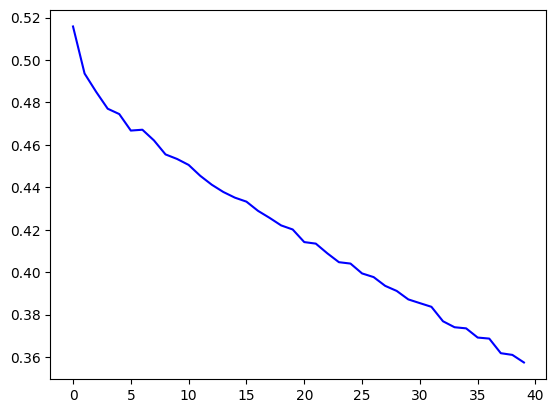

In [8]:
plt.plot(np.arange(len(loss_history)),loss_history,color= 'blue')
plt.savefig('loss.png',transparent = True)

In [6]:
import torch

In [2]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW
import random
import pandas as pd

# 1. 加载预训练的 BERT 模型和分词器
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

loss_history = []
# 冻结 BERT 层的参数
for param in bert_model.parameters():
    param.requires_grad = False

# 2. 定义微调模型
class BertFineTuningModel(torch.nn.Module):
    def __init__(self, bert_model):
        super().__init__()
        self.bert = bert_model
        # 添加额外的 Transformer 层
        self.transformer_layer = torch.nn.TransformerEncoderLayer(d_model=768, nhead=8)

    def forward(self, input_ids, attention_mask, token_index):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        transformed = self.transformer_layer(last_hidden_state)
        token_embeddings = transformed[torch.arange(input_ids.size(0)), token_index]
        return token_embeddings

# 3. 示例数据集
class MyDataset(Dataset):
    def __init__(self, sentences, tokenizer, max_length=128):
        self.sentences = sentences
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        
        #line one
        inputs = self.tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=self.max_length, padding='max_length', truncation=True, return_tensors='pt')
        

        input_ids = inputs['input_ids'][0]
        
        #line two
        attention_mask = inputs['attention_mask'][0]
        

        # 随机选择一个 token 的位置
        token_index = random.randint(0, len(input_ids) - 1)
        return input_ids, attention_mask, token_index
list_text = []
# 创建数据集
print('loading dataset...')
with open('new_strings.txt','r') as fp:
    for line in fp:
        list_text.append(line)
    fp.close()
print('finish loading...')
sentences = list_text
dataset = MyDataset(sentences, tokenizer)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)
print('setting...')
# 4. 训练设置
model = BertFineTuningModel(bert_model)


/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loading dataset...
finish loading...
setting...


In [3]:
model.load_state_dict(torch.load('bert_fine_tuned_with_transformer_layer.pth'))

<All keys matched successfully>

In [4]:
class MyDataset_test(Dataset):
    def __init__(self, sentences, tokenizer, max_length=128, mask_word=None):
        self.sentences = sentences
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.mask_word = mask_word

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        inputs = self.tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=self.max_length, padding='max_length', truncation=True, return_tensors='pt')
        input_ids = inputs['input_ids'][0]
        attention_mask = inputs['attention_mask'][0]

        # 寻找特定单词的第一个 token 的位置
        mask_token_index = self.find_first_word_index(sentence, input_ids)

        return input_ids, attention_mask, mask_token_index

    def find_first_word_index(self, sentence, input_ids):
        # 如果没有指定 mask_word，返回一个随机位置
        if not self.mask_word:
            return random.randint(0, len(input_ids) - 1)

        # 将 mask_word token 化，获取第一个 token 的 ID
        mask_word_token_id = self.tokenizer.encode(self.mask_word, add_special_tokens=False)[0]

        # 寻找该 token ID 的第一个出现的位置
        for index, token_id in enumerate(input_ids):
            if token_id == mask_word_token_id:
                return index

        # 如果单词不存在于句子中，返回一个随机位置
        return random.randint(0, len(input_ids) - 1)



In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
sentences = ["There is a possitive and optimistic sign"]
dataset_test = MyDataset_test(sentences, tokenizer,mask_word="possitive")
data_loader_test_p = DataLoader(dataset_test, batch_size=1, shuffle=True)

for input_ids, attention_mask, token_index in data_loader_test_p:
    predicted_embeddings_p = model(input_ids, attention_mask, token_index)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
sentences = ["When the bear strikes, we strike back!💥"]
dataset_test = MyDataset_test(sentences, tokenizer,mask_word="💥")
data_loader_test1 = DataLoader(dataset_test, batch_size=1, shuffle=True)
for input_ids, attention_mask, token_index in data_loader_test1:
    predicted_embeddings_1 = model(input_ids, attention_mask, token_index)

In [22]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
sentences = ["🚨 🚨 🚨  69,995,990 #USDT (69,939,993 USD) transferred from #Kraken to #Bitfinex"]
dataset_test = MyDataset_test(sentences, tokenizer,mask_word="🚨")
data_loader_test2 = DataLoader(dataset_test, batch_size=1, shuffle=True)
for input_ids, attention_mask, token_index in data_loader_test2:
    predicted_embeddings_2 = model(input_ids, attention_mask, token_index)

In [29]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
sentences = ["💰The return of the BSC king To the moom🚀"]
dataset_test = MyDataset_test(sentences, tokenizer,mask_word="🚀")
data_loader_test3 = DataLoader(dataset_test, batch_size=1, shuffle=True)
for input_ids, attention_mask, token_index in data_loader_test3:
    predicted_embeddings_3 = model(input_ids, attention_mask, token_index)

In [6]:
import torch
import torch.nn.functional as F

In [7]:
list_predicted_embedding = [predicted_embeddings_1,predicted_embeddings_2,predicted_embeddings_3]
similarity_possitive = []
for tensor1 in list_predicted_embedding:
    tensor2  = predicted_embeddings_p
    cosine_similarity = F.cosine_similarity(tensor1, tensor2)
    similarity_possitive.append(cosine_similarity)

NameError: name 'predicted_embeddings_2' is not defined

In [19]:
len(similarity_possitive)

1

<BarContainer object of 3 artists>

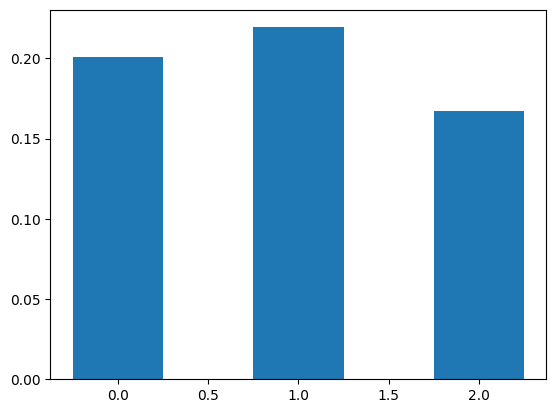

In [32]:
plt.bar(np.arange(len(similarity_possitive)),[float(item[0]) for item in similarity_possitive],width = 0.5)

In [8]:
import torch
from transformers import BertTokenizer

# 加载模型
model = BertFineTuningModel(bert_model)
model.load_state_dict(torch.load('bert_fine_tuned_with_transformer_layer.pth'))
model.eval()

# 准备数据
def prepare_data(text, tokenizer, max_length=128):
    inputs = tokenizer.encode_plus(text, add_special_tokens=True, max_length=max_length, 
                                   padding='max_length', truncation=True, return_tensors='pt')
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    return input_ids, attention_mask

# 示例文本
text = "💰The return of the BSC king To the moom🚀"
word_to_embed = "🚀"  # 您想嵌入的词

# 数据准备
input_ids, attention_mask = prepare_data(text, tokenizer)

# 找到感兴趣的词的索引
token_index = tokenizer.encode(text, add_special_tokens=True).index(tokenizer.encode(word_to_embed, add_special_tokens=False)[0])

# 获取嵌入
with torch.no_grad():
    embeddings = model(input_ids, attention_mask, torch.tensor([token_index]))

print(embeddings)


tensor([[ 2.7387e-01,  1.1745e-01,  6.1859e-01, -7.4332e-01,  1.9857e-01,
         -3.6864e-01,  6.3683e-01, -2.1701e-01, -2.1357e-01, -5.6166e-01,
         -5.9399e-01, -3.9202e-01,  3.8441e-02, -2.1293e-01,  1.0210e+00,
          6.0932e-01,  4.4334e-01, -9.7643e-02, -8.0080e-02,  1.1106e+00,
          5.8801e-01,  1.8522e-01, -2.0836e-01, -2.0450e-01,  4.5286e-01,
          3.6371e-01,  6.2951e-02, -2.2970e-01, -8.3452e-01,  2.4473e-01,
          6.1205e-01, -7.9709e-01, -8.9441e-02,  1.6280e-01,  9.6227e-02,
          9.0434e-02,  9.0230e-02, -9.9629e-02, -2.2374e-02,  3.2503e-01,
          2.8020e-01, -8.4355e-01,  1.3821e-01, -5.9134e-02, -5.4867e-01,
         -7.2324e-01, -2.0977e-01, -4.3410e-01,  5.1260e-01, -9.5113e-01,
         -5.5498e-01,  1.2605e-01,  3.8785e-01,  3.0568e-01,  3.1204e-02,
          5.0501e-01,  5.5546e-01, -5.9224e-01, -1.4493e-01, -6.5330e-01,
          1.5603e-01, -1.3660e-01, -3.8904e-01, -1.4874e-01, -2.1990e-01,
          1.0724e-01,  4.9514e-01,  4.

In [9]:

# 示例文本
text = "It's positive and optimistic and promising and lively in market!"
word_to_embed = "positive"  # 您想嵌入的词

# 数据准备
input_ids, attention_mask = prepare_data(text, tokenizer)

# 找到感兴趣的词的索引
token_index = tokenizer.encode(text, add_special_tokens=True).index(tokenizer.encode(word_to_embed, add_special_tokens=False)[0])

# 获取嵌入
with torch.no_grad():
    embeddings_p = model(input_ids, attention_mask, torch.tensor([token_index]))

print(embeddings_p)

tensor([[-1.9007e-01, -3.6754e-01,  2.6513e-01, -7.0126e-02,  2.7683e-01,
         -1.8420e-01,  3.6976e-02,  7.4770e-01, -5.1322e-01, -1.5176e-01,
         -1.9215e-01, -6.3047e-01,  2.4062e-01,  2.3594e-01,  5.8710e-01,
          2.2614e-01,  6.6088e-01, -2.3779e-01,  9.4288e-01, -2.2287e-01,
         -7.5146e-01, -5.5156e-01, -4.0767e-01,  7.5963e-01,  4.5112e-01,
         -2.1670e-01,  7.3977e-01, -1.2398e-01, -3.9872e-01, -7.7095e-01,
          1.1238e+00,  5.5694e-01, -1.6633e-03,  4.9054e-01, -2.1841e-01,
         -9.4923e-01, -8.4614e-01,  3.5900e-01, -3.0861e-01,  4.4395e-01,
         -4.1040e-01, -1.0889e+00, -1.2256e-01,  2.2858e-01,  3.4886e-01,
         -6.4717e-01, -3.2200e-01,  4.6144e-01,  9.6083e-01, -7.7850e-01,
         -3.1813e-02,  2.9753e-01, -9.5278e-01,  1.1164e-01, -1.2119e-01,
          6.6692e-01, -1.5941e-01, -1.9257e-01, -4.6136e-01, -3.0148e-01,
          1.3370e-01, -5.4084e-01,  3.9723e-01, -2.4354e-01,  8.1656e-02,
          2.5045e-02, -1.2048e-04,  5.

In [36]:
cosine_similarity = F.cosine_similarity(embeddings, embeddings_p)

In [37]:
cosine_similarity

tensor([0.3441])

In [10]:
texts =["When the bear strikes, we strike back!💥[blust]",'🚨 🚨 🚨[warning]  69,995,990 #USDT (69,939,993 USD) transferred from #Kraken to #Bitfinex','Dont invest at all 🤏','Meet experts from @0xPolygonLabs@maplefinance@PropyInc@blockchain @QuickNode and more to come 🚀[rocket fly to the sky]','🤑[lots money]SupraOracles Airdrop: Earn Up to $500k SUPRA Tokens | Join Now!','Wonder if we reach 500 ETH by the end of the epoch! 🤔','The last few days have provided us with a lot of negative bad news in crypto 💔[broken heart]','💰[money bag]The return of the BSC king To the moom🚀','⚠️The TUSD stablecoin, whose largest coiner is Justin Sun and then joined by Binance, today lost its peg to $1 (for now)','🥳[highly happy celebrating face] Massive - Now that Argentina has a pro #Bitcoin president, there’s a strong likelihood they adopt #BTC as legal tender. LFG 🇦🇷 https://t.co/0FWW7lgzds29,2023-11-19 23:24:02+00:00,$RBT Degens A Big Congratulations 👏','✅[right!] Higher Earn Plus bonuses, up to 10% p.a.',"🔥 Gorilla Defi's revolutionary presale concept goes live on 23rd Jan.With APY 328%.",'Winner 🏆 : @holaeskarepPlease DM with this link to Claim Your Prize 🎁','Winner 🏆 : @holaeskarepPlease DM with this link to Claim Your Prize 🎁','it looks like when you pass laws with no law in place you can not follow the law 😂']
words = ["💥",'🚨','🤏','🚀','🤑','🤔','💔','💰','⚠️','🥳','✅','🔥','🏆','🎁','😂']
name = ['blask','warning light','tiny','rocket','money face','thinking face','broken heart','money bag','warning triangle','celebrating face','check sigh','fire','champign cup','gift','laugh cry']
embeddings_words = []
similarity = []
for i in range(len(texts)):
    
    # 示例文本
    text = texts[i]
    word_to_embed = words[i]  # 您想嵌入的词

    # 数据准备
    input_ids, attention_mask = prepare_data(text, tokenizer)

    # 找到感兴趣的词的索引
    token_index = tokenizer.encode(text, add_special_tokens=True).index(tokenizer.encode(word_to_embed, add_special_tokens=False)[0])

    # 获取嵌入
    with torch.no_grad():
        embeddings = model(input_ids, attention_mask, torch.tensor([token_index]))
    cosine_similarity = F.cosine_similarity(embeddings, embeddings_p)
    similarity.append(cosine_similarity)
    embeddings_words.append(embeddings[0])
    

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
import matplotlib.cm as cm

In [16]:
similarity[4]

tensor([0.3689])

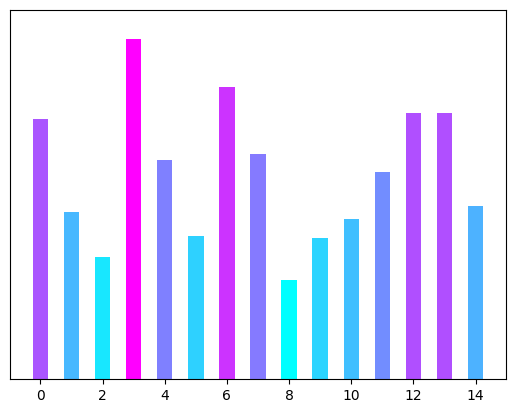

In [14]:
plt.ylim(0.25,0.45)
norm = plt.Normalize(min([float(item[0]) for item in similarity]), max([float(item[0]) for item in similarity]))
colors = cm.cool(norm([float(item[0]) for item in similarity]))
plt.bar(np.arange(len(similarity)),[float(item[0]) for item in similarity],width = 0.5,color=colors)
plt.yticks([],[])
plt.savefig("example.png",transparent = True)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize

# 创建蓝色到红色的渐变色图
colors = ["lightblue", "lightred"]
n_bins = 1000
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors, N=n_bins)


# 设置颜色条的范围
norm = Normalize(min([float(item[0]) for item in similarity]), max([float(item[0]) for item in similarity]))

# 使用自定义色图来获取颜色
colors = custom_cmap(norm([float(item[0]) for item in similarity]))

# 绘制条形图
plt.ylim(0.25, 0.45)
plt.bar(np.arange(len(similarity)), [float(item[0]) for item in similarity], width=0.5, color=colors)
plt.yticks([], [])

# 保存图像
plt.savefig("example.png", transparent=True)
plt.show()


ValueError: Invalid RGBA argument: 'lightred'

In [58]:
import umap

[tensor([[-3.0767e-01,  2.1012e-01,  1.0784e+00, -4.3988e-01, -9.4423e-02,
           8.2309e-02,  1.2995e+00, -2.4422e-01, -8.8684e-01,  2.1218e-01,
          -1.0811e+00, -5.3754e-01,  3.5020e-01, -5.4430e-01,  7.4295e-01,
           1.1751e+00,  1.0091e+00, -4.1447e-01,  5.0429e-01,  1.2064e+00,
           5.2833e-01,  9.1624e-01, -1.3217e-01, -2.2991e-01,  1.5281e+00,
           8.3676e-01,  4.0273e-01, -4.6352e-02, -1.5337e+00, -6.4175e-01,
           1.1888e+00,  8.5856e-01, -4.4182e-01,  1.4970e-01,  3.7085e-01,
           3.6893e-01,  1.8582e-01,  1.1578e-01,  4.0049e-01,  1.2167e+00,
          -5.5702e-01, -5.1494e-01,  3.4172e-01, -9.4436e-02, -7.0466e-01,
          -1.4215e+00, -1.4725e+00, -6.6831e-02,  6.0299e-01, -1.4230e+00,
          -1.2969e+00,  1.1947e+00,  7.7774e-01, -5.2744e-01, -1.4908e+00,
           2.3933e-01,  6.7449e-01, -1.5287e+00, -3.2812e-01, -1.1580e+00,
          -6.8300e-01, -9.5878e-01, -4.0580e-01, -6.3898e-01, -8.5153e-01,
           7.7739e-01, -2

In [97]:
embeddings = np.array(embeddings_words)
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

/home/ubuntu/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/ubuntu/.local/lib/python3.10/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [98]:
similarity_ = [item[0] for item in similarity]

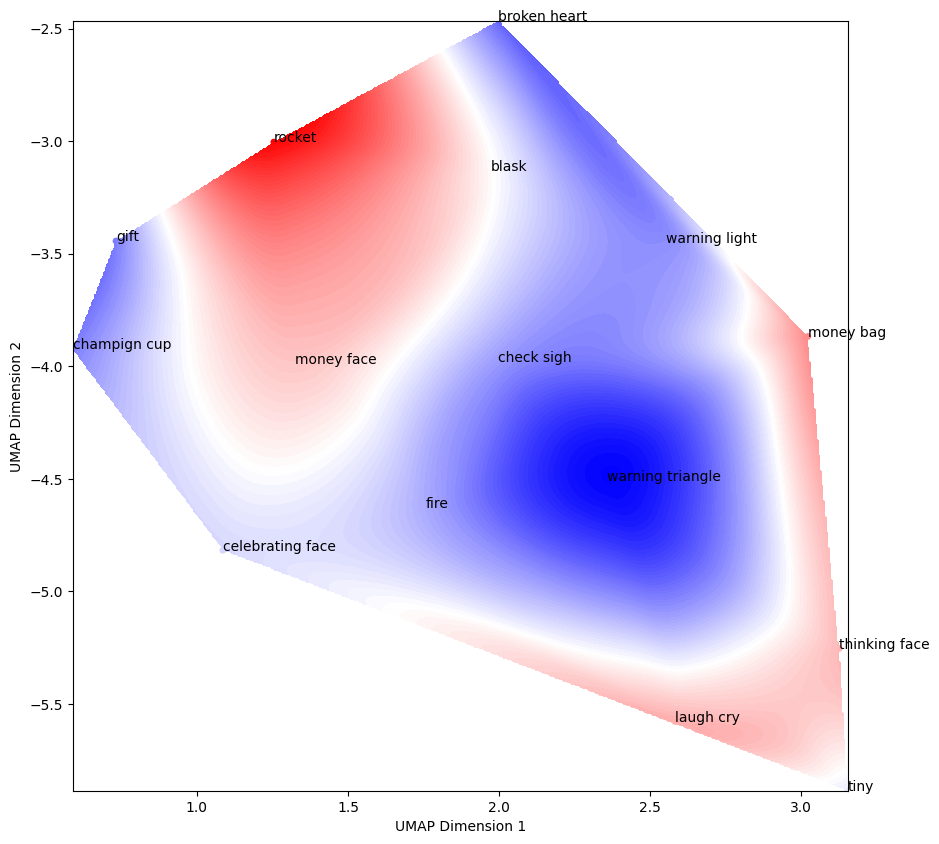

In [101]:
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Create grid coordinates
xi = np.linspace(umap_embeddings[:, 0].min(), umap_embeddings[:, 0].max(), 500)
yi = np.linspace(umap_embeddings[:, 1].min(), umap_embeddings[:, 1].max(), 500)
xi, yi = np.meshgrid(xi, yi)
plt.figure(figsize=(10, 10))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=15, c = similarity, cmap = 'bwr')  # s is the size of points
for i in range(len(umap_embeddings[:,0])):
    plt.text(umap_embeddings[:, 0][i], umap_embeddings[:, 1][i],name[i])
# Interpolate the values onto the grid
zi = griddata((umap_embeddings[:, 0], umap_embeddings[:, 1]), similarity_, (xi, yi), method='cubic')
plt.contourf(xi, yi, zi, levels=100, cmap='bwr')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.savefig("umap result.png",transparent = True)
plt.show()


In [85]:
similarity

[tensor([0.3474]),
 tensor([0.3289]),
 tensor([0.3435]),
 tensor([0.3862]),
 tensor([0.3558]),
 tensor([0.3578]),
 tensor([0.3222]),
 tensor([0.3651]),
 tensor([0.3071]),
 tensor([0.3404]),
 tensor([0.3307]),
 tensor([0.3334]),
 tensor([0.3265]),
 tensor([0.3265])]

In [102]:
list_text = []
# 创建数据集
print('loading dataset...')
with open('new_strings.txt','r') as fp:
    for line in fp:
        list_text.append(line)
    fp.close()
print('finish loading...')

loading dataset...
finish loading...


In [15]:
df_trainset = pd.read_csv('BTCtestFinal.csv')

In [16]:
df_trainset

Unnamed: 0        Date  \
0            3048  2019-03-08   
1            3049  2019-03-08   
2            3050  2019-03-08   
3            3051  2019-03-08   
4            3052  2019-03-08   
...           ...         ...   
10895       15232  2019-11-23   
10896       15233  2019-11-23   
10897       15234  2019-11-23   
10898       15235  2019-11-23   
10899       15236  2019-11-23   

                                                    text Sentiment  
0      Salesforce Delivery Manager CRM, Agile, PSD2 -...  Negative  
1      #crypto price changes last 4 hours\n\n🚀[A rock...  Negative  
2      🔄[A repeat single button emoji] Prices update ...  Negative  
3      Entry Level Tech Recruiter - Jobspring Partner...  Negative  
4      Senior Cancer Research Scientist - Cybercoders...  Negative  
...                                                  ...       ...  
10895  $BTC 👀[A pair of eyes emoji]👇[A pointing down ...  Positive  
10896  🚨[An alarm or warning light emoji]🚨[An alarm o...  Positive  
10897  @Cointelegraph 🧐[A face with monocle emoji]\nh...  Positive  
10898  🔄[A repeat single button emoji] Prices update ...  Positive  
10899  🔥[A fire or flame emoji]🔥[A fire or flame emoj...  Positive  

[10900 rows x 4 columns]

In [17]:
list_text = list(df_trainset['text'])

In [18]:
df_emoji_unicode = pd.read_csv("emoji_unicode_file.csv")

In [19]:


def extract_emojis(s):
    try:
        return [char for char in s if char in list(df_emoji_unicode['emoji'])]
    except:
        return []

# 示例句子列表
sentences = list_text

# 创建字典
emoji_dict = {s: extract_emojis(s) for s in sentences if extract_emojis(s)}

emoji_dict


{'Salesforce Delivery Manager CRM, Agile, PSD2 - E-synergy Solutions - [ 📋[A clipboard emoji] More Info  https://t.co/wNA4sbS2Ro ] #Agile #Scrum #Agile #Kanban #ProjectMangement #Agile #jobs #Hiring #Careers # # #BitCoin #ETH #crypto https://t.co/3RaDkvqL67': ['📋'],
 '#crypto price changes last 4 hours\n\n🚀[A rocket emoji]\n$UKG +22.43%\n$RCN +12.31%\n$HST +9.21%\n\n🌧️\n$TX -9.16%\n$QNT -6.49%\n$BRX -5.35%\n\n#bitcoin #cryptocurrency': ['🚀'],
 '🔄[A repeat single button emoji] Prices update in $USD (1 hour):\n\n$BTC - 3874.6 $ (-0.01 %)\n$ETH - 135.36 $ (-0.01 %)\n$XRP - 0.31 $   (-0.53 %)\n$BCH - 127.9 $  (-0.08 %)\n$BSV - 66.3 $   (-0.6 %)\n$LTC - 55.86 $  (-0.6 %)\n\n#USD #Dollar #BTC #ETH #XRP #BCH #BSV #LTC #Trading #Crypto #Bitcoin #Ethereum': ['🔄'],
 'Entry Level Tech Recruiter - Jobspring Partners ( Los Angeles, CA, USA )  - [ 📋[A clipboard emoji] More Info  https://t.co/ALQI0SBwbb ]  #tech #jobs #Hiring #Careers #LosAngeles #CA #Cryptocurrency #Blockchain #BTC #BitCoin #ETH #cr

In [20]:
df_emoji_unicode = pd.read_csv('emoji_unicode_file.csv')

In [21]:
df_emoji_unicode

Unnamed: 0.1  Unnamed: 0 emoji unicode                   filename  \
0               0           0     🔥   1f525  emoji_pic/emoji_1f525.png   
1               1           1     🚀   1f680  emoji_pic/emoji_1f680.png   
2               2           2     🏆   1f3c6  emoji_pic/emoji_1f3c6.png   
3               3           3     👇   1f447  emoji_pic/emoji_1f447.png   
4               4           4     👀   1f440  emoji_pic/emoji_1f440.png   
..            ...         ...   ...     ...                        ...   
318           318         318     🏛   1f3db  emoji_pic/emoji_1f3db.png   
319           319         319     🚪   1f6aa  emoji_pic/emoji_1f6aa.png   
320           320         320     🤢   1f922  emoji_pic/emoji_1f922.png   
321           321         321     🥤   1f964  emoji_pic/emoji_1f964.png   
322           322         322     💐   1f490  emoji_pic/emoji_1f490.png   

                gpt4description  
0         A fire or flame emoji  
1                A rocket emoji  
2                A trophy emoji  
3    A pointing down hand emoji  
4          A pair of eyes emoji  
..                          ...  
318  A classical building emoji  
319                A door emoji  
320      A nauseated face emoji  
321            A soda cup emoji  
322  A bouquet of flowers emoji  

[323 rows x 6 columns]

In [22]:
for key in emoji_dict:
    print(key)

Salesforce Delivery Manager CRM, Agile, PSD2 - E-synergy Solutions - [ 📋[A clipboard emoji] More Info  https://t.co/wNA4sbS2Ro ] #Agile #Scrum #Agile #Kanban #ProjectMangement #Agile #jobs #Hiring #Careers # # #BitCoin #ETH #crypto https://t.co/3RaDkvqL67
#crypto price changes last 4 hours

🚀[A rocket emoji]
$UKG +22.43%
$RCN +12.31%
$HST +9.21%

🌧️
$TX -9.16%
$QNT -6.49%
$BRX -5.35%

#bitcoin #cryptocurrency
🔄[A repeat single button emoji] Prices update in $USD (1 hour):

$BTC - 3874.6 $ (-0.01 %)
$ETH - 135.36 $ (-0.01 %)
$XRP - 0.31 $   (-0.53 %)
$BCH - 127.9 $  (-0.08 %)
$BSV - 66.3 $   (-0.6 %)
$LTC - 55.86 $  (-0.6 %)

#USD #Dollar #BTC #ETH #XRP #BCH #BSV #LTC #Trading #Crypto #Bitcoin #Ethereum
Entry Level Tech Recruiter - Jobspring Partners ( Los Angeles, CA, USA )  - [ 📋[A clipboard emoji] More Info  https://t.co/ALQI0SBwbb ]  #tech #jobs #Hiring #Careers #LosAngeles #CA #Cryptocurrency #Blockchain #BTC #BitCoin #ETH #crypto https://t.co/ejB0rlViWG
Senior Cancer Research Scie

In [23]:
import sys, time

class ShowProcess():
    """
    显示处理进度的类
    调用该类相关函数即可实现处理进度的显示
    """
    i = 0 # 当前的处理进度
    max_steps = 0 # 总共需要处理的次数
    max_arrow = 50 #进度条的长度
    infoDone = 'done'

    # 初始化函数，需要知道总共的处理次数
    def __init__(self, max_steps, infoDone = 'Done'):
        self.max_steps = max_steps
        self.i = 0
        self.infoDone = infoDone

    # 显示函数，根据当前的处理进度i显示进度
    # 效果为[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100.00%
    def show_process(self, i=None):
        if i is not None:
            self.i = i
        else:
            self.i += 1
        num_arrow = int(self.i * self.max_arrow / self.max_steps) #计算显示多少个'>'
        num_line = self.max_arrow - num_arrow #计算显示多少个'-'
        percent = self.i * 100.0 / self.max_steps #计算完成进度，格式为xx.xx%
        process_bar = '[' + '>' * num_arrow + '-' * num_line + ']'\
                      + '%.2f' % percent + '%' + '\r' #带输出的字符串，'\r'表示不换行回到最左边
        sys.stdout.write(process_bar) #这两句打印字符到终端
        sys.stdout.flush()
        if self.i >= self.max_steps:
            self.close()

    def close(self):
        print('')
        print(self.infoDone)
        self.i = 0


In [24]:
len(emoji_dict)

10791

In [25]:
np.mean([1,2,3])

2.0

In [26]:
max_step = len(emoji_dict)
process_bar = ShowProcess(max_step, 'process finished')

In [27]:
emo_score = []
sentences = []
for key in emoji_dict:
    process_bar.show_process()
    try:
        emo_score_temp = []
        for emoji in emoji_dict[key]:
            # 示例文本
            text = key
            word_to_embed = emoji  # 您想嵌入的词

            # 数据准备
            input_ids, attention_mask = prepare_data(text, tokenizer)

            # 找到感兴趣的词的索引
            token_index = tokenizer.encode(text, add_special_tokens=True).index(tokenizer.encode(word_to_embed, add_special_tokens=False)[0])

            # 获取嵌入
            with torch.no_grad():
                embeddings = model(input_ids, attention_mask, torch.tensor([token_index]))
            cosine_similarity = F.cosine_similarity(embeddings, embeddings_p)
            print(cosine_similarity)
            emo_score_temp.append(cosine_similarity)
        sentences.append(key)
        emo_score.append(np.mean(emo_score_temp))
    except:
        continue

    

tensor([0.3957])-----------------------------------]0.01%
tensor([0.3666])-----------------------------------]0.02%
tensor([0.3368])-----------------------------------]0.03%
tensor([0.3899])-----------------------------------]0.04%
tensor([0.3722])-----------------------------------]0.05%
tensor([0.3451])-----------------------------------]0.06%
tensor([0.4186])-----------------------------------]0.06%
tensor([0.4242])-----------------------------------]0.07%
tensor([0.3833])-----------------------------------]0.08%
tensor([0.3833])
tensor([0.3833])
tensor([0.3833])
tensor([0.3833])
tensor([0.3771])-----------------------------------]0.09%
tensor([0.4066])-----------------------------------]0.10%
tensor([0.3918])-----------------------------------]0.11%
tensor([0.3709])-----------------------------------]0.12%
tensor([0.4251])-----------------------------------]0.13%
tensor([0.4393])-----------------------------------]0.14%
tensor([0.3429])-----------------------------------]0.15%
tens

Token indices sequence length is longer than the specified maximum sequence length for this model (733 > 512). Running this sequence through the model will result in indexing errors


tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476])
tensor([0.3476

In [28]:
emo_score

[0.39571145,
 0.36660036,
 0.33684513,
 0.38989988,
 0.37216172,
 0.34512246,
 0.41858158,
 0.4241691,
 0.3833185,
 0.3770694,
 0.4066271,
 0.391818,
 0.37090793,
 0.42510724,
 0.43929657,
 0.34293434,
 0.2716449,
 0.39006793,
 0.3853594,
 0.4099528,
 0.4027131,
 0.38688007,
 0.3852963,
 0.45131886,
 0.40292525,
 0.4107572,
 0.37753606,
 0.3844837,
 0.3827116,
 0.40735048,
 0.38281727,
 0.29168686,
 0.34881064,
 0.45294157,
 0.4126203,
 0.39284417,
 0.3692343,
 0.4108671,
 0.3447072,
 0.33979264,
 0.3979799,
 0.40255624,
 0.38560185,
 0.4062567,
 0.38274032,
 0.42285362,
 0.3710124,
 0.423772,
 0.3712464,
 0.39828816,
 0.3773571,
 0.43645227,
 0.44502673,
 0.4027018,
 0.42214477,
 0.3613832,
 0.4310956,
 0.38011727,
 0.36352485,
 0.36241913,
 0.41883332,
 0.37826133,
 0.3769301,
 0.38915977,
 0.37902412,
 0.33744618,
 0.37594983,
 0.37921736,
 0.37067494,
 0.3710648,
 0.3738456,
 0.39671898,
 0.38554028,
 0.4103303,
 0.38208595,
 0.38016322,
 0.41966805,
 0.39112285,
 0.40173477,
 0.38

In [29]:
df_sentiment_sentence = pd.DataFrame()
df_sentiment_sentence['text'] = sentences
df_sentiment_sentence['score'] = emo_score

In [30]:
df1 = df_sentiment_sentence
df2 = df_trainset
merged_df = pd.merge(df1, df2, on='text', how='inner')

In [31]:
merged_df.to_csv('timed_sentiment_test.csv')

In [2]:
import pandas as pd

In [3]:
merged_df = pd.read_csv("timed_sentiment_test.csv")

In [5]:
merged_df = merged_df.drop(columns = "Unnamed: 0.1")

In [6]:
merged_df

text     score  \
0      Salesforce Delivery Manager CRM, Agile, PSD2 -...  0.395711   
1      #crypto price changes last 4 hours\n\n🚀[A rock...  0.366600   
2      🔄[A repeat single button emoji] Prices update ...  0.336845   
3      Entry Level Tech Recruiter - Jobspring Partner...  0.389900   
4      Senior Cancer Research Scientist - Cybercoders...  0.372162   
...                                                  ...       ...   
10876  $BTC 👀[A pair of eyes emoji]👇[A pointing down ...  0.423489   
10877  🚨[An alarm or warning light emoji]🚨[An alarm o...  0.344392   
10878  @Cointelegraph 🧐[A face with monocle emoji]\nh...  0.443748   
10879  🔄[A repeat single button emoji] Prices update ...  0.319513   
10880  🔥[A fire or flame emoji]🔥[A fire or flame emoj...  0.366409   

       Unnamed: 0        Date Sentiment  
0            3048  2019-03-08  Negative  
1            3049  2019-03-08  Negative  
2            3050  2019-03-08  Negative  
3            3051  2019-03-08  Negative  
4            3052  2019-03-08  Negative  
...           ...         ...       ...  
10876       15232  2019-11-23  Positive  
10877       15233  2019-11-23  Positive  
10878       15234  2019-11-23  Positive  
10879       15235  2019-11-23  Positive  
10880       15236  2019-11-23  Positive  

[10881 rows x 5 columns]

In [7]:
# 根据 'time' 列分组，并计算每组的 'score' 平均值
df_time_score = pd.DataFrame()
df_time_score['score'] = merged_df['score']
df_time_score['time'] = merged_df['Date']
# 将 'time' 列转换为日期类型，只保留日期部分
df_time_score['time'] = pd.to_datetime(df_time_score['time']).dt.date

# 根据 'time' 列分组，并计算每组的 'score' 平均值
avg_scores = df_time_score.groupby('time')['score'].max().reset_index()



In [34]:
# 根据 'time' 列分组，并计算每组的 'score' 平均值
df_time_score = pd.DataFrame()
df_time_score['score'] = merged_df['score']
df_time_score['time'] = merged_df['Date']
# 将 'time' 列转换为日期类型，只保留日期部分
df_time_score['time'] = pd.to_datetime(df_time_score['time']).dt.date

# 根据 'time' 列分组，并计算每组的 'score' 平均值
avg_scores = df_time_score.groupby('time')['score'].mean().reset_index()



In [14]:
import pandas as pd

# 假设 merged_df 是您的原始 DataFrame
# merged_df = pd.DataFrame({'Date': [...], 'score': [...]})

# 准备数据
df_time_score = pd.DataFrame()
df_time_score['score'] = merged_df['score']
df_time_score['time'] = merged_df['Date']
df_time_score['time'] = pd.to_datetime(df_time_score['time']).dt.date

# 定义一个函数来获取每组最高的 5 个 score 的平均值
def top_5_mean(group):
    return group.nlargest(10).mean()

# 根据 'time' 列分组，对每组应用 top_5_mean 函数
top5_avg_scores = df_time_score.groupby('time')['score'].apply(top_5_mean).reset_index()

# 查看结果
print(top5_avg_scores)


           time     score
0    2019-03-08  0.428153
1    2019-03-12  0.424136
2    2019-04-02  0.430746
3    2019-04-03  0.432218
4    2019-04-08  0.434619
..          ...       ...
213  2019-11-19  0.429936
214  2019-11-20  0.427472
215  2019-11-21  0.434521
216  2019-11-22  0.424591
217  2019-11-23  0.424907

[218 rows x 2 columns]


In [15]:
top5_avg_scores.to_csv("top10_score_test.csv")

In [56]:
import pandas as pd

# 假设 merged_df 是您的原始 DataFrame
# merged_df = pd.DataFrame({'Date': [...], 'text': [...], 'score': [...]})

# 函数：计算文本中字符🚀出现的次数
def count_rockets(text):
    return text.count('🚀')

# 函数：获取每个日期组中score最高的5个text中🚀的总出现次数
def top5_rockets(group):
    top_texts = group.nlargest(5, 'score')['text']
    return top_texts.apply(count_rockets).sum()

# 将 'Date' 列转换为日期类型
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date

# 根据 'Date' 列分组，并应用 top5_rockets 函数
rockets_per_day = merged_df.groupby('Date').apply(top5_rockets).reset_index(name='rocket_count')

# 查看结果
print(rockets_per_day['rocket_count'].sum())


74


In [59]:
import pandas as pd

# 假设 merged_df 是您的原始 DataFrame
# merged_df = pd.DataFrame({'Date': [...], 'text': [...], 'score': [...]})

# 定义要统计的 emoji 列表
emoji_list = list(df_emoji_unicode['emoji']) # 包含了一些常见 emoji

# 函数：计算文本中单个 emoji 的出现次数
def count_emoji(text, emoji):
    return text.count(emoji)

# 函数：获取每个日期组中score最高的5个text中每种 emoji 的出现次数
def top5_emojis(group, emoji_list):
    top_texts = group.nlargest(5, 'score')['text']
    emoji_counts = {emoji: top_texts.apply(lambda text: count_emoji(text, emoji)).sum() for emoji in emoji_list}
    return emoji_counts

# 将 'Date' 列转换为日期类型
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date

# 根据 'Date' 列分组，并应用 top5_emojis 函数
emojis_per_day = merged_df.groupby('Date').apply(lambda group: top5_emojis(group, emoji_list))

# 查看结果
print(emojis_per_day)


Date
2019-03-08    {'🔥': 0, '🚀': 0, '🏆': 0, '👇': 0, '👀': 0, '🤝': ...
2019-03-12    {'🔥': 0, '🚀': 0, '🏆': 0, '👇': 0, '👀': 0, '🤝': ...
2019-04-02    {'🔥': 1, '🚀': 0, '🏆': 0, '👇': 0, '👀': 0, '🤝': ...
2019-04-03    {'🔥': 0, '🚀': 0, '🏆': 0, '👇': 0, '👀': 0, '🤝': ...
2019-04-08    {'🔥': 0, '🚀': 0, '🏆': 0, '👇': 0, '👀': 0, '🤝': ...
                                    ...                        
2019-11-19    {'🔥': 0, '🚀': 0, '🏆': 0, '👇': 0, '👀': 1, '🤝': ...
2019-11-20    {'🔥': 0, '🚀': 0, '🏆': 0, '👇': 0, '👀': 0, '🤝': ...
2019-11-21    {'🔥': 0, '🚀': 0, '🏆': 0, '👇': 0, '👀': 0, '🤝': ...
2019-11-22    {'🔥': 0, '🚀': 0, '🏆': 0, '👇': 0, '👀': 0, '🤝': ...
2019-11-23    {'🔥': 0, '🚀': 0, '🏆': 0, '👇': 0, '👀': 0, '🤝': ...
Length: 218, dtype: object


In [60]:
import pandas as pd
from collections import defaultdict

# 假设 emojis_per_day 是每天每个 emoji 的出现次数的 Series
# emojis_per_day = merged_df.groupby('Date').apply(lambda group: top5_emojis(group, emoji_list))

# 初始化一个默认字典来累加每个 emoji 的总出现次数
total_emoji_counts = defaultdict(int)

# 遍历每个日期的 emoji 计数，并累加到总计数字典
for daily_counts in emojis_per_day:
    for emoji, count in daily_counts.items():
        total_emoji_counts[emoji] += count

# 转换为普通字典并打印结果
total_emoji_counts = dict(total_emoji_counts)
print(total_emoji_counts)


{'🔥': 30, '🚀': 74, '🏆': 3, '👇': 17, '👀': 32, '🤝': 0, '💎': 0, '🥳': 6, '🚨': 8, '💥': 8, '🤣': 21, '📥': 0, '🙏': 36, '👏': 9, '🎉': 7, '🎁': 2, '👉': 13, '😂': 101, '📌': 0, '📨': 1, '📈': 40, '📩': 5, '👋': 7, '🎯': 2, '👍': 45, '💰': 13, '🌴': 1, '💯': 19, '🍒': 0, '🧊': 0, '🔔': 2, '💌': 0, '🔸': 2, '🏻': 8, '\U0001faf6': 0, '🍀': 4, '💪': 10, '🏽': 2, '🤔': 36, '💜': 1, '\U0001fae1': 0, '👌': 10, '👑': 6, '🌱': 0, '🏼': 3, '🔘': 0, '🤩': 4, '🥰': 4, '🌐': 1, '💙': 2, '🌟': 1, '💸': 1, '😊': 23, '😘': 4, '💡': 3, '😎': 36, '🤯': 9, '🦾': 0, '🐰': 0, '👊': 4, '📢': 5, '🤖': 2, '🐂': 0, '💚': 1, '😍': 6, '🤑': 14, '🦄': 0, '🙌': 8, '💫': 0, '💵': 2, '😀': 24, '😅': 16, '🦋': 0, '🎊': 0, '💖': 1, '📊': 1, '🎮': 1, '🙋': 20, '🎖': 0, '🪂': 0, '🏾': 0, '🧡': 3, '😝': 0, '🧑': 0, '🤗': 2, '💛': 1, '🐝': 0, '👾': 1, '🥇': 3, '🛑': 1, '💞': 1, '😆': 12, '🧐': 6, '🔗': 6, '😁': 28, '😭': 18, '🤞': 2, '📅': 4, '📸': 0, '💁': 3, '🗓': 1, '😄': 11, '🤌': 0, '🐒': 0, '🥺': 3, '💴': 0, '💶': 0, '📣': 2, '\U0001faf5': 0, '🐶': 1, '🔹': 0, '🎄': 1, '🎟': 1, '🔒': 1, '📍': 5, '🏎': 0, '💻': 1, '🤜': 1, '🤛

In [61]:
count = []
emoji= []
for key in total_emoji_counts:
    if total_emoji_counts[key]!=0:
        count.append(total_emoji_counts[key])
        emoji.append(key)

In [63]:
df_top = pd.DataFrame()
df_top['emoji'] = emoji
df_top['count'] = count

In [86]:
df_top_sorted = df_top.sort_values(by='count', ascending=False).iloc[:15,:]

In [88]:
df_top_sorted.to_csv('top5_emoji_cal.csv')

In [75]:
list(df_top_sorted['emoji'])[:15]

['😂', '🚀', '😉', '👍', '📈', '🧠', '🙏', '😎', '🤔', '👀', '🔥', '😁', '😀', '😊', '🤣']

In [76]:
list(df_top_sorted['count'])[:15]

[101, 74, 45, 45, 40, 39, 36, 36, 36, 32, 30, 28, 24, 23, 21]

Text(0.5, 1.0, 'top 15 most frequent emojis in top 5 tweets')

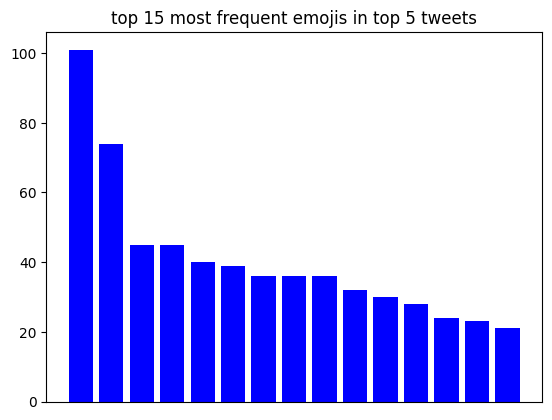

In [81]:
plt.bar(np.arange(15),list(df_top_sorted['count'])[:15],color = 'blue')
plt.xticks([],[])
plt.title("top 15 most frequent emojis in top 5 tweets")

In [96]:
df_low_sorted = df_low.sort_values(by='count', ascending=False)


In [97]:
df_low_sorted.to_csv('low5_emoji_cal.csv')

In [102]:
df_low_sorted = pd.read_csv("low5_emoji_cal.csv")

In [98]:
list(df_low_sorted['emoji'])

['💚', '📢', '📉', '😂', '👉', '👊', '🔴', '💥', '💸', '🚨', '🔄', '🔻', '👇', '💼', '🎰']

In [99]:
list(df_low_sorted['count'])

[132, 122, 116, 115, 112, 93, 66, 54, 44, 38, 33, 27, 25, 6, 3]

Text(0.5, 1.0, 'top 15 most frequent emojis in low 5 tweets')

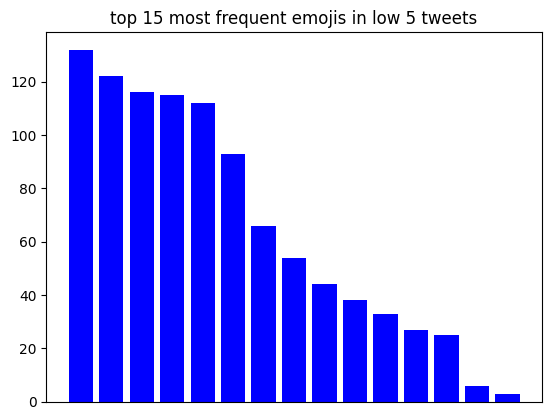

In [101]:
plt.bar(np.arange(15),list(df_low_sorted['count']),color = 'blue')
plt.xticks([],[])
plt.title("top 15 most frequent emojis in low 5 tweets")

In [57]:
import pandas as pd

# 假设 merged_df 是您的原始 DataFrame
# merged_df = pd.DataFrame({'Date': [...], 'text': [...], 'score': [...]})

# 函数：计算文本中字符🚀出现的次数
def count_rockets(text):
    return text.count('🔥')

# 函数：获取每个日期组中score最高的5个text中🚀的总出现次数
def top5_rockets(group):
    top_texts = group.nlargest(5, 'score')['text']
    return top_texts.apply(count_rockets).sum()

# 将 'Date' 列转换为日期类型
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date

# 根据 'Date' 列分组，并应用 top5_rockets 函数
rockets_per_day = merged_df.groupby('Date').apply(top5_rockets).reset_index(name='rocket_count')

# 查看结果
print(rockets_per_day['rocket_count'].sum())


30


In [58]:
import pandas as pd

# 假设 merged_df 是您的原始 DataFrame
# merged_df = pd.DataFrame({'Date': [...], 'text': [...], 'score': [...]})

# 函数：计算文本中字符🚀出现的次数
def count_rockets(text):
    return text.count('💥')

# 函数：获取每个日期组中score最高的5个text中🚀的总出现次数
def top5_rockets(group):
    top_texts = group.nlargest(5, 'score')['text']
    return top_texts.apply(count_rockets).sum()

# 将 'Date' 列转换为日期类型
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date

# 根据 'Date' 列分组，并应用 top5_rockets 函数
rockets_per_day = merged_df.groupby('Date').apply(top5_rockets).reset_index(name='rocket_count')

# 查看结果
print(rockets_per_day['rocket_count'].sum())


8


In [47]:
avg_scores

time     score
0    2019-03-08  0.452942
1    2019-03-12  0.452702
2    2019-04-02  0.449517
3    2019-04-03  0.451603
4    2019-04-08  0.446401
..          ...       ...
213  2019-11-19  0.452761
214  2019-11-20  0.444126
215  2019-11-21  0.446851
216  2019-11-22  0.453669
217  2019-11-23  0.443748

[218 rows x 2 columns]

In [48]:
avg_scores.to_csv('max_score_test.csv')

In [50]:
top5_avg_scores.to_csv("top5_score_test.csv")

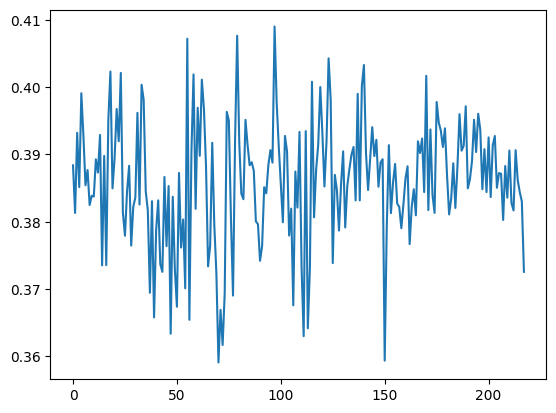

In [44]:
plt.plot(np.arange(len(avg_scores['score'])),list(avg_scores['score']))

In [46]:
df_sentiment_sentence.to_csv('sentiment_sentence.csv')

In [2]:
import pandas as pd

In [58]:
import pandas as pd 

def FinBERT_sentiment_score(heading):
    """
    compute sentiment score using pretrained FinBERT on -1 to 1 scale. -1 being negative and 1 being positive
    """
    from transformers import AutoTokenizer, AutoModelForSequenceClassification
    from transformers import pipeline
    tokenizer = AutoTokenizer.from_pretrained('ProsusAI/finbert')
    finbert = AutoModelForSequenceClassification.from_pretrained('ProsusAI/finbert')
    nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)
    result = nlp(heading)
    if result[0]['label'] == "positive":
        return result[0]['score']
    elif result[0]['label'] == "neutral":
        return 0
    else:
        return (0 - result[0]['score'])

In [43]:
FinBERT_sentiment_score('wonderful! we gonna make large money')

0.6867281198501587

In [59]:
finbert_score = []
for sentence in sentences:
    try:
        finbert_score.append(FinBERT_sentiment_score(sentence))
    except:
        finbert_score.append(-1)

In [11]:
df_sentimentscore = pd.DataFrame()

In [62]:
df_sentimentscore['emoji'] = emo_score

In [19]:
df_sentimentscore.to_csv('sentiment.csv')

In [22]:
df_sentimentscore = pd.read_csv("sentiment.csv")

In [23]:
filtered_df = df_sentimentscore[df_sentimentscore['finbert'] != -1 ]
#filtered_df = filtered_df[filtered_df['finbert'] != 0 ]

In [32]:
import matplotlib.pyplot as plt
import numpy as np

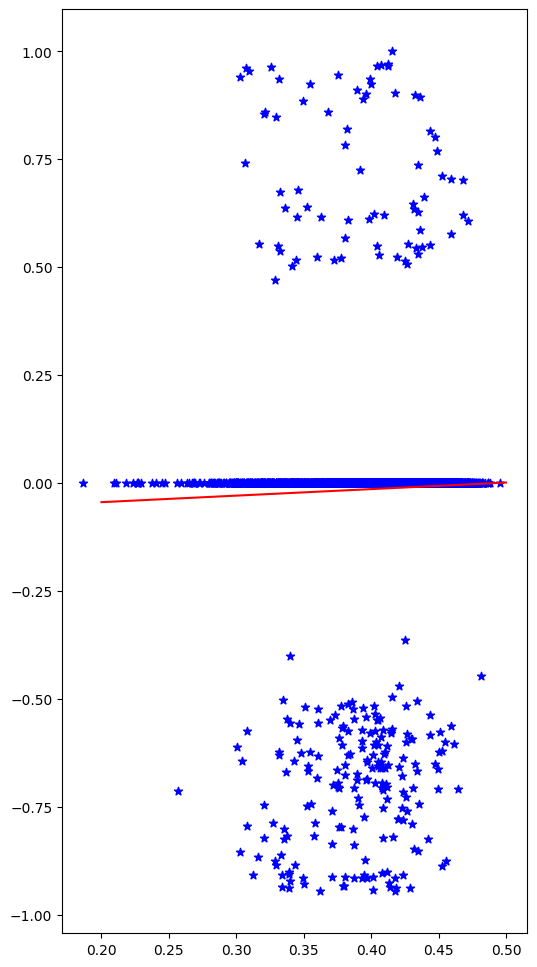

In [37]:
plt.figure(figsize=(6,12))
plt.scatter(filtered_df['emoji'],filtered_df['finbert'],marker = "*",c = 'blue')


# Given slope (a) and intercept (b)
a = 0.1512   # example slope
b = -0.0746  # example intercept

# Generate x values
x = np.linspace(0.2, 0.5, 400)

# Calculate the y values based on the slope and intercept
y = a * x + b

# Plot the line

plt.plot(x, y, '-r', label=f'y = {a}x + {b}')


plt.show()


In [68]:
import statsmodels.api as sm
import numpy as np

In [20]:
import statsmodels.api as sm
import numpy as np

# 示例数据
X = filtered_df['emoji']
y = filtered_df['finbert'] # 因变量

# 增加一个截距项到 X
X = sm.add_constant(X)

# 创建模型并拟合数据
model = sm.OLS(y, X).fit()

# 打印回归结果
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                finbert   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     9.154
Date:                Fri, 02 Feb 2024   Prob (F-statistic):            0.00249
Time:                        02:30:45   Log-Likelihood:                 2849.6
No. Observations:                6014   AIC:                            -5695.
Df Residuals:                    6012   BIC:                            -5682.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0746      0.020     -3.672      0.0

In [2]:
import pandas as pd

In [13]:
df_btc_dext = pd.read_csv("crypto_10k.csv")


In [14]:
df_btc_dext

Unnamed: 0                       Date         Username  \
0              0  2022-11-30 11:53:21+00:00   0xEthereumYoda   
1              1  2022-11-30 11:53:21+00:00  Lawrenc32984128   
2              2  2022-11-30 11:53:21+00:00  NITESHP55784410   
3              3  2022-11-30 11:53:20+00:00          817coin   
4              4  2022-11-30 11:53:18+00:00        slamtoken   
...          ...                        ...              ...   
10453       9995  2022-11-30 09:16:43+00:00   tecniaofficial   
10454       9996  2022-11-30 09:16:41+00:00  BullshitTrader_   
10455       9997  2022-11-30 09:16:40+00:00         rektBart   
10456       9998  2022-11-30 09:16:39+00:00   kamalalshehabi   
10457       9999  2022-11-30 09:16:38+00:00        jimmyvs24   

                                                 Content  \
0      #Ethereum price update: \n\n#ETH $1269.23 USD\...   
1      @mtmalinen @ecb Do well to understand that eve...   
2      Kayla #Ethereum Harold #世界杯 Egbert #百家乐 Lavern...   
3      #Bitcoin https://t.co/2koLlCvCri https://t.co/...   
4      Yesterday we made a 3,000 SLAM buyback and loc...   
...                                                  ...   
10453  Digital Rupee or e-Rupee is a form of digital ...   
10454  In bear market, short every pump n dca every u...   
10455  Take that high and I’m max short #btc https://...   
10456  في خطة التوسع حول العالم، باينانس تستحوذ على م...   
10457  The 15m #bitcoin just went into self custody h...   

                                                     URL  \
0      https://twitter.com/0xEthereumYoda/status/1597...   
1      https://twitter.com/Lawrenc32984128/status/159...   
2      https://twitter.com/NITESHP55784410/status/159...   
3      https://twitter.com/817coin/status/15979217174...   
4      https://twitter.com/slamtoken/status/159792171...   
...                                                  ...   
10453  https://twitter.com/tecniaofficial/status/1597...   
10454  https://twitter.com/BullshitTrader_/status/159...   
10455  https://twitter.com/rektBart/status/1597882292...   
10456  https://twitter.com/kamalalshehabi/status/1597...   
10457  https://twitter.com/jimmyvs24/status/159788228...   

                                                Hashtags  
0      ['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...  
1                                                ['BTC']  
2                    ['Ethereum', '世界杯', '百家乐', '世界杯买球']  
3                                            ['Bitcoin']  
4                            ['slamtoken', 'bnb', 'bsc']  
...                                                  ...  
10453  ['tias', 'tecnia', 'rupee', 'digital', 'digita...  
10454                       ['btc', 'bitcoin', 'crypto']  
10455                                            ['btc']  
10456                    ['crypto', 'binance', 'كريبتو']  
10457                                        ['bitcoin']  

[10458 rows x 6 columns]

In [15]:
df_emoji_unicode = pd.read_csv("emoji_unicode_file.csv")

In [16]:
df_emoji_unicode

Unnamed: 0.1  Unnamed: 0 emoji unicode                   filename  \
0               0           0     🔥   1f525  emoji_pic/emoji_1f525.png   
1               1           1     🚀   1f680  emoji_pic/emoji_1f680.png   
2               2           2     🏆   1f3c6  emoji_pic/emoji_1f3c6.png   
3               3           3     👇   1f447  emoji_pic/emoji_1f447.png   
4               4           4     👀   1f440  emoji_pic/emoji_1f440.png   
..            ...         ...   ...     ...                        ...   
318           318         318     🏛   1f3db  emoji_pic/emoji_1f3db.png   
319           319         319     🚪   1f6aa  emoji_pic/emoji_1f6aa.png   
320           320         320     🤢   1f922  emoji_pic/emoji_1f922.png   
321           321         321     🥤   1f964  emoji_pic/emoji_1f964.png   
322           322         322     💐   1f490  emoji_pic/emoji_1f490.png   

                gpt4description  
0         A fire or flame emoji  
1                A rocket emoji  
2                A trophy emoji  
3    A pointing down hand emoji  
4          A pair of eyes emoji  
..                          ...  
318  A classical building emoji  
319                A door emoji  
320      A nauseated face emoji  
321            A soda cup emoji  
322  A bouquet of flowers emoji  

[323 rows x 6 columns]

In [6]:
import pandas as pd

# 示例 DataFrame
data = {
    'text': ['Hello 😊', 0.5,'No emojis here', 'Another one 🚀', 'Just text']
}
df = pd.DataFrame(data)

# 定义检查 emoji 的函数
def contains_emoji(s):
    try:
        return any(char in list(df_emoji_unicode['emoji']) for char in s)
    except:
        return False


# 删除不含 emoji 的行
df = df[df['text'].apply(contains_emoji)]

df



text
0        Hello 😊
3  Another one 🚀

In [17]:
import numpy as np

In [20]:
import pandas as pd
import numpy as np
import multiprocessing
from multiprocessing import Pool

def contains_emoji(s, emoji_list):
    try:
        return any(char in emoji_list for char in s)
    except:
        return False

def process_chunk(chunk, emoji_list):
    return chunk[chunk['Content'].apply(contains_emoji, args=(emoji_list,))]

def parallelize_dataframe(df, func, n_cores, emoji_list):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    results = [pool.apply_async(func, args=(chunk, emoji_list)) for chunk in df_split]
    pool.close()
    pool.join()
    return pd.concat([result.get() for result in results])

emoji_list = list(df_emoji_unicode['emoji'])
n_cores = multiprocessing.cpu_count()

df_washed = parallelize_dataframe(df_btc_dext, process_chunk, n_cores, emoji_list)


In [12]:
df_washed.to_csv('BTC.csv')

In [22]:
df_washed = pd.read_csv('BTC.csv')

In [23]:
df_washed

Unnamed: 0        Date  \
0                 1  2019-05-27   
1                 5  2019-05-27   
2                22  2019-05-27   
3                35  2019-05-27   
4                45  2019-05-27   
...             ...         ...   
1642994    19344002  2019-11-23   
1642995    19344007  2019-11-23   
1642996    19344021  2019-11-23   
1642997    19344027  2019-11-23   
1642998    19344041  2019-11-23   

                                                      text Sentiment  
0        Cardano: Digitize Currencies; EOS https://t.co...  Positive  
1        #btc inceldiği yerden kopsun bakalım 17:00 ye ...  Positive  
2                                                      🤣🤣🤣  Positive  
3                       mahachi👏👏👏 https://t.co/YONsRNRy6y  Positive  
4        ICYMI: Ruden Holding, a Japanese real estate c...  Positive  
...                                                    ...       ...  
1642994  💰 Market Cap: $203,124,270,922\n👊 BTC Dominanc...  Positive  
1642995  🚨 Saturdays are for #ShakingSats\n\n🎉 We're gi...  Positive  
1642996  @StormYorha @BlazinHopeZ Lmao he probably thin...  Positive  
1642997  So i am posting this article that i found on F...  Positive  
1642998  $200 #PayPal or #Bitcoin #giveaway \n1) RT thi...  Positive  

[1642999 rows x 4 columns]

In [24]:
import pandas as pd

# 假设 df 是您的原始 DataFrame
# df = pd.read_csv('your_file.csv')  # 例如，这样读取 CSV 文件

# 按 'Date' 列分组，并对每个分组应用抽样函数
def sample_or_all(group):
    n = min(len(group), 50)  # 抽取的行数，最多 50 行
    return group.sample(n, replace=False)

# 应用函数并合并结果
sampled_df = df_washed.groupby('Date', group_keys=False).apply(sample_or_all)

# 输出结果
print(sampled_df)


         Unnamed: 0        Date  \
161473      4478389  2015-08-02   
161474      4494294  2015-10-09   
161695      5042988  2015-12-08   
161475      4511445  2015-12-14   
161696      5168763  2016-04-15   
...             ...         ...   
1642298    19338958  2019-11-23   
1641099    19330960  2019-11-23   
1642851    19342951  2019-11-23   
1640307    19325447  2019-11-23   
1639245    19317386  2019-11-23   

                                                      text Sentiment  
161473   [ANN] 💥 Yannik Faucet 💥 Direct XAPO Payments 💥...  Positive  
161474   Folks in the great state of Texas can now trad...  Positive  
161695   lmao the /r/bitcoin thread about wired's satos...  Positive  
161475   ฿ FREE Bitcoins 💰 from the btc4you faucet: htt...  Positive  
161696   idea: #bitcoin 💰 market disruption\n\nmining\n...  Positive  
...                                                    ...       ...  
1642298                                           $BTC 👀👇🏻  Positive  
1641099  🚨🚨

In [25]:
sampled_df.to_csv("sampled.csv")

In [28]:
sampled_df = pd.read_csv("sampled.csv")

In [30]:
list(sampled_df.value_counts('Date')).count(50)

218

In [31]:
sampled_df

Unnamed: 0.1  Unnamed: 0        Date  \
0            161473     4478389  2015-08-02   
1            161474     4494294  2015-10-09   
2            161695     5042988  2015-12-08   
3            161475     4511445  2015-12-14   
4            161696     5168763  2016-04-15   
...             ...         ...         ...   
15232       1642298    19338958  2019-11-23   
15233       1641099    19330960  2019-11-23   
15234       1642851    19342951  2019-11-23   
15235       1640307    19325447  2019-11-23   
15236       1639245    19317386  2019-11-23   

                                                    text Sentiment  
0      [ANN] 💥 Yannik Faucet 💥 Direct XAPO Payments 💥...  Positive  
1      Folks in the great state of Texas can now trad...  Positive  
2      lmao the /r/bitcoin thread about wired's satos...  Positive  
3      ฿ FREE Bitcoins 💰 from the btc4you faucet: htt...  Positive  
4      idea: #bitcoin 💰 market disruption\n\nmining\n...  Positive  
...                                                  ...       ...  
15232                                           $BTC 👀👇🏻  Positive  
15233  🚨🚨4hr Volume Alert!🚨🚨 $ENG current volume: 39....  Positive  
15234          @Cointelegraph 🧐\nhttps://t.co/pbPndChjJ5  Positive  
15235  🔄 Prices update in $EUR (1 hour):\n\n$BTC   - ...  Positive  
15236  🔥🔥15m Volume Alert!🔥🔥 $LEND current volume: 6....  Positive  

[15237 rows x 5 columns]

In [35]:
# 过滤出至少有 50 行的日期
filtered_df_test = sampled_df.groupby('Date').filter(lambda x: len(x) >= 50)

# 输出结果
print(filtered_df_test)

       Unnamed: 0.1  Unnamed: 0        Date  \
3048         161279     4343542  2019-03-08   
3049         161075     4342302  2019-03-08   
3050         161113     4342581  2019-03-08   
3051         161134     4342662  2019-03-08   
3052         161095     4342463  2019-03-08   
...             ...         ...         ...   
15232       1642298    19338958  2019-11-23   
15233       1641099    19330960  2019-11-23   
15234       1642851    19342951  2019-11-23   
15235       1640307    19325447  2019-11-23   
15236       1639245    19317386  2019-11-23   

                                                    text Sentiment  
3048   Salesforce Delivery Manager CRM, Agile, PSD2 -...  Negative  
3049   #crypto price changes last 4 hours\n\n🚀\n$UKG ...  Negative  
3050   🔄 Prices update in $USD (1 hour):\n\n$BTC - 38...  Negative  
3051   Entry Level Tech Recruiter - Jobspring Partner...  Negative  
3052   Senior Cancer Research Scientist - Cybercoders...  Negative  
...                  

In [36]:
example_list = list(filtered_df_test['text'])

In [37]:
def is_emoji(s):
    # Check if a character is an emoji based on Unicode ranges
    return ('\U0001F300' <= s <= '\U0001F5FF' or
            '\U0001F600' <= s <= '\U0001F64F' or
            '\U0001F680' <= s <= '\U0001F6FF' or
            '\U0001F700' <= s <= '\U0001F77F' or
            '\U0001F780' <= s <= '\U0001F7FF' or
            '\U0001F800' <= s <= '\U0001F8FF' or
            '\U0001F900' <= s <= '\U0001F9FF' or
            '\U0001FA00' <= s <= '\U0001FA6F' or
            '\U0001FA70' <= s <= '\U0001FAFF')

def extract_and_count_emojis(string_list):
    emoji_count = {}
    for text in string_list:
        for char in text:
            if is_emoji(char):
                emoji_count[char] = emoji_count.get(char, 0) + 1
    return emoji_count

# Example usage
#example_list = ["Hello 👋", "I love Python 🐍", "Happy coding! 😊👩‍💻"]
emoji_counts = extract_and_count_emojis(example_list)
print(emoji_counts)


{'📋': 752, '🚀': 1881, '🌧': 58, '🔄': 165, '🏹': 6, '🎯': 83, '👍': 368, '👕': 4, '😋': 35, '💰': 2448, '🥳': 83, '👇': 829, '📢': 281, '🌏': 31, '👆': 58, '📈': 1183, '🌹': 31, '😍': 227, '📩': 36, '💥': 346, '🤔': 312, '💣': 20, '📣': 100, '😊': 250, '🎉': 327, '🔥': 1917, '👀': 214, '🌐': 44, '📱': 40, '🙏': 255, '📊': 217, '😉': 219, '🥈': 9, '🙂': 59, '🍾': 13, '🤑': 470, '💪': 179, '👏': 152, '😂': 986, '📄': 2, '🔃': 5, '📲': 28, '🤝': 35, '😅': 96, '🔗': 40, '😘': 51, '😎': 296, '🙌': 88, '🏻': 281, '👉': 545, '👈': 122, '🎁': 320, '🤖': 138, '🖖': 4, '🤷': 100, '🏾': 161, '🎱': 2, '🌴': 4, '🚨': 443, '💚': 170, '📽': 13, '🙃': 10, '👊': 167, '🏼': 273, '😄': 69, '😜': 48, '🧡': 14, '🔒': 7, '🤪': 46, '😴': 9, '🌙': 35, '💯': 223, '💡': 27, '🔆': 11, '💖': 18, '💙': 15, '🍯': 1, '🦡': 2, '🤗': 50, '🌎': 85, '🐂': 17, '😶': 5, '📮': 2, '😚': 2, '😆': 60, '🤘': 25, '💶': 268, '💱': 64, '📌': 73, '📉': 1228, '💸': 437, '😀': 116, '🛒': 12, '📆': 12, '🏄': 8, '🤙': 23, '🏽': 130, '🏆': 148, '😈': 8, '😁': 174, '🙈': 27, '🔰': 19, '🍜': 3, '🥶': 3, '💵': 305, '👌': 118, '🌛': 54, '🔺': 

In [38]:
sorted_emoji_counts = dict(sorted(emoji_counts.items(), key=lambda item: item[1], reverse=True))


In [39]:
i=0
for key in sorted_emoji_counts:
    if i == 20:
        break
    else: 
        print(key)
        i+=1

💰
🔥
🚀
📉
📈
😂
👇
📋
👉
🤑
🚨
💸
🤣
👍
💥
🔻
🎉
🎁
🤔
💵


In [17]:
len(sorted_emoji_counts)

1049

In [41]:
import matplotlib.pyplot as plt

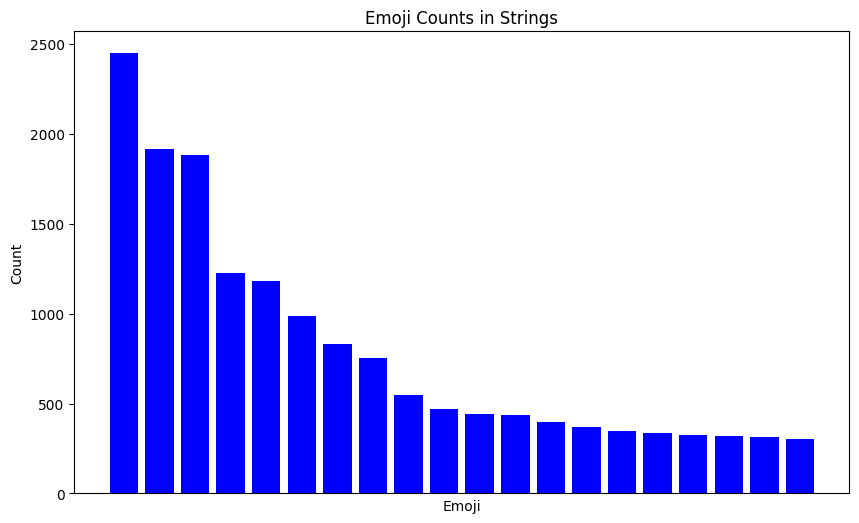

In [42]:
df = pd.DataFrame(list(sorted_emoji_counts.items()), columns=['Emoji', 'Count'])
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Emoji'].iloc[:20], df['Count'].iloc[:20], color='blue')
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.title('Emoji Counts in Strings')
plt.xticks([],[])
plt.savefig("BTCEmojiCount.png", transparent = True)
plt.show()

In [43]:
np.arange(1)

array([0])

In [44]:
df_flamingo_code = pd.read_csv("emoji_unicode_file.csv")

In [45]:
df_flamingo_code

Unnamed: 0.1  Unnamed: 0 emoji unicode                   filename  \
0               0           0     🔥   1f525  emoji_pic/emoji_1f525.png   
1               1           1     🚀   1f680  emoji_pic/emoji_1f680.png   
2               2           2     🏆   1f3c6  emoji_pic/emoji_1f3c6.png   
3               3           3     👇   1f447  emoji_pic/emoji_1f447.png   
4               4           4     👀   1f440  emoji_pic/emoji_1f440.png   
..            ...         ...   ...     ...                        ...   
318           318         318     🏛   1f3db  emoji_pic/emoji_1f3db.png   
319           319         319     🚪   1f6aa  emoji_pic/emoji_1f6aa.png   
320           320         320     🤢   1f922  emoji_pic/emoji_1f922.png   
321           321         321     🥤   1f964  emoji_pic/emoji_1f964.png   
322           322         322     💐   1f490  emoji_pic/emoji_1f490.png   

                gpt4description  
0         A fire or flame emoji  
1                A rocket emoji  
2                A trophy emoji  
3    A pointing down hand emoji  
4          A pair of eyes emoji  
..                          ...  
318  A classical building emoji  
319                A door emoji  
320      A nauseated face emoji  
321            A soda cup emoji  
322  A bouquet of flowers emoji  

[323 rows x 6 columns]

In [29]:
import torch
from flamingo_mini import FlamingoModel, FlamingoConfig, FlamingoProcessor
from flamingo_mini.utils import load_url
from einops import repeat
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import sys


def multimodal_prompt(model: FlamingoModel, processor: FlamingoProcessor, prompt: str, images: list) -> str:
    """few-shot multimodal prompting 
    
    shape for visual_features parameter: [b=batch size, N=number of images, T=1 (number of frames), v=number of visual features, d=dimensionality of visual feature]
    (I haven't checked if it works with videos)
    """
    input_ids, media_locations, attention_mask = processor.encode_text(prompt)

    pixels = processor(images)['pixel_values']
    pixels = repeat(pixels, 'N c h w -> b N T c h w', b=1, T=1)
    
    output = model.generate(
        inputs=input_ids,
        media_locations=media_locations,
        attention_mask=attention_mask,
        pixel_values=pixels,
        max_length=1000,
        use_cache=True,
        early_stopping=True,
        bos_token_id=model.flamingo.lm.config.bos_token_id,
        eos_token_id=model.flamingo.lm.config.eos_token_id,
        pad_token_id=model.flamingo.lm.config.eos_token_id
    )

    response = processor.tokenizer.batch_decode(output, skip_special_tokens=True)
    return response[0]

model = FlamingoModel.from_pretrained('dhansmair/flamingo-mini')         # or flamingo-tiny
processor = FlamingoProcessor(model.config)






In [46]:
multimodal_prompt(model = model ,processor = processor,prompt = " What this emoji shows(only describe what's in this pic): <image>", images=[Image.open(df_flamingo_code['filename'][3])])

/home/ubuntu/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/.local/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


" What this emoji shows(only describe what's in this pic): <image>a piece of meat with a long tail<EOC>"

In [48]:
for item in list(df_flamingo_code['emoji']):
    print("describe this picture within one sentence or phrase: "+item)

describe this picture within one sentence or phrase: 🔥
describe this picture within one sentence or phrase: 🚀
describe this picture within one sentence or phrase: 🏆
describe this picture within one sentence or phrase: 👇
describe this picture within one sentence or phrase: 👀
describe this picture within one sentence or phrase: 🤝
describe this picture within one sentence or phrase: 💎
describe this picture within one sentence or phrase: 🥳
describe this picture within one sentence or phrase: 🚨
describe this picture within one sentence or phrase: 💥
describe this picture within one sentence or phrase: 🤣
describe this picture within one sentence or phrase: 📥
describe this picture within one sentence or phrase: 🙏
describe this picture within one sentence or phrase: 👏
describe this picture within one sentence or phrase: 🎉
describe this picture within one sentence or phrase: 🎁
describe this picture within one sentence or phrase: 👉
describe this picture within one sentence or phrase: 😂
describe t

In [50]:
# 打开文本文件
with open('emojigpt4_emoji.txt', 'r') as file:
    # 初始化一个空列表来存储文本内容
    text_list = []
    
    # 逐行读取文件
    for line in file:
        # 使用字符串分割函数去掉序号部分
        content = line.split('.')[1].strip()
        
        # 将处理后的内容添加到列表中
        text_list.append(content)

# 打印结果
print(text_list)


['A fire or flame emoji', 'A rocket emoji', 'A trophy emoji', 'A pointing down hand emoji', 'A pair of eyes emoji', 'A handshake emoji', 'A diamond or gem emoji', 'A partying face emoji', 'An alarm or warning light emoji', 'A collision or explosion emoji', 'A laughing face with tears emoji', 'An inbox tray emoji', 'A praying hands emoji', 'A clapping hands emoji', 'A party popper emoji', 'A gift or present emoji', 'A pointing right hand emoji', 'A laughing face with tears emoji', 'A pushpin or thumbtack emoji', 'An envelope emoji', 'A chart increasing emoji', 'An outbox tray emoji', 'A waving hand emoji', 'A direct hit or bullseye emoji', 'A thumbs up emoji', 'A bag of money or wealth emoji', 'A palm tree emoji', 'A hundred points or perfect score emoji', 'A cherry fruit emoji', 'An ice cube emoji', 'A bell emoji', 'A love letter emoji', 'A small orange diamond emoji', 'A light skin tone emoji modifier', 'A heart hands emoji', 'A four-leaf clover emoji', 'A flexed biceps emoji', 'A med

In [51]:
df_flamingo_code['gpt4description'] = text_list

In [52]:
df_flamingo_code

Unnamed: 0 emoji unicode                   filename  \
0             0     🔥   1f525  emoji_pic/emoji_1f525.png   
1             1     🚀   1f680  emoji_pic/emoji_1f680.png   
2             2     🏆   1f3c6  emoji_pic/emoji_1f3c6.png   
3             3     👇   1f447  emoji_pic/emoji_1f447.png   
4             4     👀   1f440  emoji_pic/emoji_1f440.png   
..          ...   ...     ...                        ...   
318         318     🏛   1f3db  emoji_pic/emoji_1f3db.png   
319         319     🚪   1f6aa  emoji_pic/emoji_1f6aa.png   
320         320     🤢   1f922  emoji_pic/emoji_1f922.png   
321         321     🥤   1f964  emoji_pic/emoji_1f964.png   
322         322     💐   1f490  emoji_pic/emoji_1f490.png   

                gpt4description  
0         A fire or flame emoji  
1                A rocket emoji  
2                A trophy emoji  
3    A pointing down hand emoji  
4          A pair of eyes emoji  
..                          ...  
318  A classical building emoji  
319                A door emoji  
320      A nauseated face emoji  
321            A soda cup emoji  
322  A bouquet of flowers emoji  

[323 rows x 5 columns]

In [53]:
df_flamingo_code.to_csv('emoji_unicode_file.csv')

In [46]:
df_text = filtered_df_test

In [47]:
df_text

Unnamed: 0.1  Unnamed: 0        Date  \
3048         161279     4343542  2019-03-08   
3049         161075     4342302  2019-03-08   
3050         161113     4342581  2019-03-08   
3051         161134     4342662  2019-03-08   
3052         161095     4342463  2019-03-08   
...             ...         ...         ...   
15232       1642298    19338958  2019-11-23   
15233       1641099    19330960  2019-11-23   
15234       1642851    19342951  2019-11-23   
15235       1640307    19325447  2019-11-23   
15236       1639245    19317386  2019-11-23   

                                                    text Sentiment  
3048   Salesforce Delivery Manager CRM, Agile, PSD2 -...  Negative  
3049   #crypto price changes last 4 hours\n\n🚀\n$UKG ...  Negative  
3050   🔄 Prices update in $USD (1 hour):\n\n$BTC - 38...  Negative  
3051   Entry Level Tech Recruiter - Jobspring Partner...  Negative  
3052   Senior Cancer Research Scientist - Cybercoders...  Negative  
...                                                  ...       ...  
15232                                           $BTC 👀👇🏻  Positive  
15233  🚨🚨4hr Volume Alert!🚨🚨 $ENG current volume: 39....  Positive  
15234          @Cointelegraph 🧐\nhttps://t.co/pbPndChjJ5  Positive  
15235  🔄 Prices update in $EUR (1 hour):\n\n$BTC   - ...  Positive  
15236  🔥🔥15m Volume Alert!🔥🔥 $LEND current volume: 6....  Positive  

[10900 rows x 5 columns]

In [48]:
import pandas as pd
import re

# 示例 DataFrame，您需要用您的实际数据替换这些
df_emojis = df_flamingo_code
df_texts = df_text

# 创建 emoji 到文本描述的映射
emoji_to_desc = dict(zip(df_emojis['emoji'], df_emojis['gpt4description']))

# 定义一个函数来处理文本中的 emoji
def replace_emoji_with_description(text):
    # 使用正则表达式匹配所有 emoji
    try:
        return re.sub(
        '|'.join(re.escape(emoji) for emoji in emoji_to_desc.keys()),
        lambda match: match.group(0) + '[' + emoji_to_desc[match.group(0)] + ']',
        text
        )
    except:
        return ''

# 应用这个函数到 df_texts 的 'text' 列
df_texts['text'] = df_texts['text'].apply(replace_emoji_with_description)

# 显示更新后的 DataFrame
print(df_texts)


       Unnamed: 0.1  Unnamed: 0        Date  \
3048         161279     4343542  2019-03-08   
3049         161075     4342302  2019-03-08   
3050         161113     4342581  2019-03-08   
3051         161134     4342662  2019-03-08   
3052         161095     4342463  2019-03-08   
...             ...         ...         ...   
15232       1642298    19338958  2019-11-23   
15233       1641099    19330960  2019-11-23   
15234       1642851    19342951  2019-11-23   
15235       1640307    19325447  2019-11-23   
15236       1639245    19317386  2019-11-23   

                                                    text Sentiment  
3048   Salesforce Delivery Manager CRM, Agile, PSD2 -...  Negative  
3049   #crypto price changes last 4 hours\n\n🚀[A rock...  Negative  
3050   🔄[A repeat single button emoji] Prices update ...  Negative  
3051   Entry Level Tech Recruiter - Jobspring Partner...  Negative  
3052   Senior Cancer Research Scientist - Cybercoders...  Negative  
...                  

In [49]:
df_text.drop(columns='Unnamed: 0').drop(columns='Unnamed: 0.1').to_csv('BTCtestFinal.csv')

In [62]:
df_fortrain = pd.read_csv("gpt4trainset.csv")
df_fortrain.dropna(subset=['text'], inplace=True)
sentences = list(df_fortrain['text'])

In [63]:
len(sentences)

13011